City Rainfall Pattern Analysis
- From: Minor 1 – Statistics
-   Extension: Analyze rainfall data → seasonal variation.
- Add-ons: Line plots, variance analysis.
- Difficulty: Medium

[Dataset used in the analysis](https://www.kaggle.com/datasets/rajanand/rainfall-in-india)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
full_dataset = pd.read_csv('district wise rainfall normal.csv')

In [4]:
full_dataset.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [10]:
full_dataset.shape

(641, 19)

In [5]:
full_dataset.columns

Index(['STATE_UT_NAME', 'DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb',
       'Mar-May', 'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [6]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  641 non-null    object 
 1   DISTRICT       641 non-null    object 
 2   JAN            641 non-null    float64
 3   FEB            641 non-null    float64
 4   MAR            641 non-null    float64
 5   APR            641 non-null    float64
 6   MAY            641 non-null    float64
 7   JUN            641 non-null    float64
 8   JUL            641 non-null    float64
 9   AUG            641 non-null    float64
 10  SEP            641 non-null    float64
 11  OCT            641 non-null    float64
 12  NOV            641 non-null    float64
 13  DEC            641 non-null    float64
 14  ANNUAL         641 non-null    float64
 15  Jan-Feb        641 non-null    float64
 16  Mar-May        641 non-null    float64
 17  Jun-Sep        641 non-null    float64
 18  Oct-Dec   

In [7]:
full_dataset.isnull().sum()

,0
STATE_UT_NAME,0
DISTRICT,0
JAN,0
FEB,0
MAR,0
APR,0
MAY,0
JUN,0
JUL,0
AUG,0


In [8]:
full_dataset.duplicated().sum()

np.int64(0)

In [9]:
full_dataset.describe()


,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.00000,641.000000
mean,18.355070,20.984399,30.034789,45.543214,81.535101,196.007332,326.033697,291.152262,194.609048,90.446334,34.117473,18.150858,1346.969579,39.339470,157.113105,1007.80234,142.714665
std,21.082806,27.729596,45.451082,71.556279,111.960390,196.556284,221.364643,152.647325,99.830540,74.990685,59.371274,32.711009,838.878874,47.212773,213.445888,629.33261,148.951752
min,0.000000,0.000000,0.000000,0.000000,0.900000,3.800000,11.600000,14.100000,8.600000,3.100000,1.200000,0.000000,94.600000,0.000000,1.500000,39.60000,5.600000
25%,6.900000,7.000000,7.000000,5.000000,12.100000,68.800000,206.400000,194.600000,128.800000,34.300000,6.600000,5.300000,830.400000,14.700000,27.800000,625.40000,51.600000
50%,13.300000,12.300000,12.700000,15.100000,33.900000,131.900000,293.700000,284.800000,181.300000,62.600000,12.900000,7.900000,1116.200000,27.700000,67.200000,896.60000,86.700000
75%,19.200000,24.100000,33.200000,48.300000,91.900000,226.600000,374.800000,358.100000,234.100000,130.200000,32.300000,14.900000,1530.900000,41.100000,172.400000,1193.80000,175.200000
max,144.500000,229.600000,367.900000,554.400000,733.700000,1476.200000,1820.900000,1522.100000,826.300000,517.700000,475.100000,297.700000,7229.300000,335.300000,1256.500000,5228.00000,1048.500000


In [16]:
full_dataset['STATE_UT_NAME'].unique()

array(['ANDAMAN And NICOBAR ISLANDS', 'ARUNACHAL PRADESH', 'ASSAM',
       'MEGHALAYA', 'MANIPUR', 'MIZORAM', 'NAGALAND', 'TRIPURA',
       'WEST BENGAL', 'SIKKIM', 'ORISSA', 'JHARKHAND', 'BIHAR',
       'UTTAR PRADESH', 'UTTARANCHAL', 'HARYANA', 'CHANDIGARH', 'DELHI',
       'PUNJAB', 'HIMACHAL', 'JAMMU AND KASHMIR', 'RAJASTHAN',
       'MADHYA PRADESH', 'GUJARAT', 'DADAR NAGAR HAVELI', 'DAMAN AND DUI',
       'MAHARASHTRA', 'GOA', 'CHATISGARH', 'ANDHRA PRADESH', 'TAMIL NADU',
       'PONDICHERRY', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [29]:
CG_CITY = full_dataset[(full_dataset['STATE_UT_NAME'] == 'CHATISGARH')].reset_index()

In [30]:
CG_CITY

,index,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,519,CHATISGARH,BASTAR,8.2,8.6,16.2,36.7,38.6,203.8,350.9,373.9,225.6,81.4,12.4,6.3,1362.6,16.8,91.5,1154.2,100.1
1,520,CHATISGARH,BILASPUR,17.4,17.2,17.9,15.0,18.1,171.1,357.9,336.3,202.5,54.8,9.4,11.4,1229.0,34.6,51.0,1067.8,75.6
2,521,CHATISGARH,DURG,6.4,5.7,12.3,7.0,9.3,173.0,325.6,320.7,198.7,56.5,4.7,3.0,1122.9,12.1,28.6,1018.0,64.2
3,522,CHATISGARH,RAIGARH,11.0,12.8,11.6,11.4,18.3,179.8,373.2,356.9,233.6,49.5,6.6,5.2,1269.9,23.8,41.3,1143.5,61.3
4,523,CHATISGARH,RAIPUR,6.5,8.5,12.3,9.2,16.5,170.3,352.9,327.1,196.7,52.6,7.4,4.6,1164.6,15.0,38.0,1047.0,64.6
5,524,CHATISGARH,SURGUJA,18.7,15.1,13.6,8.5,14.5,198.5,393.7,379.2,223.7,50.7,9.2,6.5,1331.9,33.8,36.6,1195.1,66.4
6,525,CHATISGARH,RAJNANDGAON,9.0,9.2,12.6,7.8,15.5,169.3,351.6,341.1,214.6,60.9,8.4,9.3,1209.3,18.2,35.9,1076.6,78.6
7,526,CHATISGARH,DANTEWADA,2.6,0.8,4.5,14.7,21.9,180.5,407.9,381.0,208.7,93.2,10.8,1.3,1327.9,3.4,41.1,1178.1,105.3
8,527,CHATISGARH,KANKER (NORH,7.9,11.1,14.8,18.1,19.9,191.7,392.5,423.4,229.1,73.7,8.3,4.7,1395.2,19.0,52.8,1236.7,86.7
9,528,CHATISGARH,JANJGIR-CHAMP,13.1,12.1,14.2,7.0,11.3,167.6,394.1,417.2,223.0,44.1,5.2,6.9,1315.8,25.2,32.5,1201.9,56.2


In [31]:
DURG_DATA = full_dataset[(full_dataset['DISTRICT'] == 'DURG')]

In [32]:
DURG_DATA

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
521,CHATISGARH,DURG,6.4,5.7,12.3,7.0,9.3,173.0,325.6,320.7,198.7,56.5,4.7,3.0,1122.9,12.1,28.6,1018.0,64.2


In [34]:
DURG_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 521 to 521
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  1 non-null      object 
 1   DISTRICT       1 non-null      object 
 2   JAN            1 non-null      float64
 3   FEB            1 non-null      float64
 4   MAR            1 non-null      float64
 5   APR            1 non-null      float64
 6   MAY            1 non-null      float64
 7   JUN            1 non-null      float64
 8   JUL            1 non-null      float64
 9   AUG            1 non-null      float64
 10  SEP            1 non-null      float64
 11  OCT            1 non-null      float64
 12  NOV            1 non-null      float64
 13  DEC            1 non-null      float64
 14  ANNUAL         1 non-null      float64
 15  Jan-Feb        1 non-null      float64
 16  Mar-May        1 non-null      float64
 17  Jun-Sep        1 non-null      float64
 18  Oct-Dec        

In [44]:
cols_for_bar_monthwise = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]


In [37]:
cols_for_bar_periodwise = ["Jan-Feb","Mar-May"	,"Jun-Sep"	,"Oct-Dec"]

In [38]:
DURG_DATA[cols_for_bar_periodwise]

,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
521,12.1,28.6,1018.0,64.2


In [45]:
DURG_DATA[cols_for_bar_monthwise]

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
521,6.4,5.7,12.3,7.0,9.3,173.0,325.6,320.7,198.7,56.5,4.7,3.0


In [46]:
DURG_DATA['ANNUAL']

,ANNUAL
521,1122.9


In [79]:
monthly_rainfall = [6.4, 5.7, 12.3, 7.0, 9.3,
                    173.0, 325.6, 320.7, 198.7,
                    56.5, 4.7, 3.0]
series = pd.Series(monthly_rainfall)
variance = series.var()
print("Variance:", variance)

Variance: 16071.158409090911


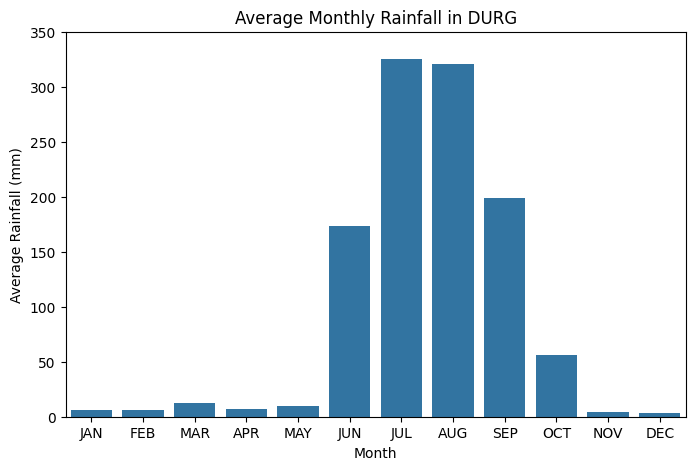

In [55]:
plt.figure(figsize=(8,5))

monthly_avg = DURG_DATA[cols_for_bar_monthwise].mean()
sns.barplot(x=monthly_avg.index,y=monthly_avg.values)
plt.yticks(np.arange(0,400,50))
plt.xlabel("Month")
plt.ylabel("Average Rainfall (mm)")
plt.title("Average Monthly Rainfall in DURG")
plt.show()


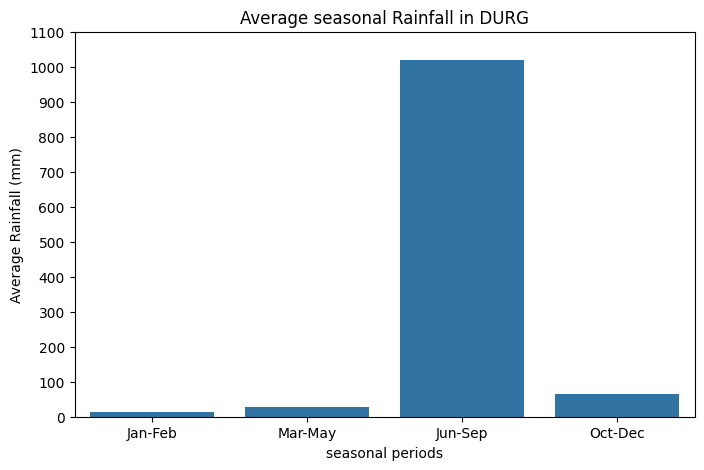

In [63]:
plt.figure(figsize=(8,5))
period_avg = DURG_DATA[cols_for_bar_periodwise].mean()
sns.barplot(x=period_avg.index,y=period_avg.values)
plt.yticks(np.arange(0,1200,100))
plt.xlabel("seasonal periods")
plt.ylabel("Average Rainfall (mm)")
plt.title("Average seasonal Rainfall in DURG")
plt.show()

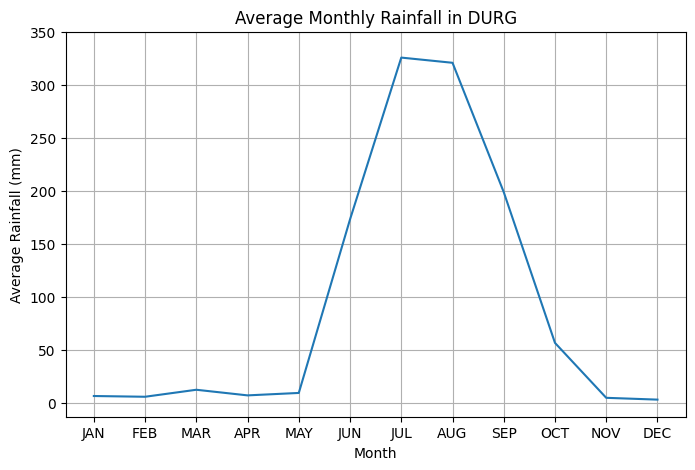

In [73]:
plt.figure(figsize=(8,5))
sns.lineplot(x=cols_for_bar_monthwise,y=monthly_avg.values)
plt.yticks(np.arange(0,400,50))
plt.grid(True)
plt.xlabel("Month")
plt.ylabel("Average Rainfall (mm)")
plt.title("Average Monthly Rainfall in DURG")
plt.show()

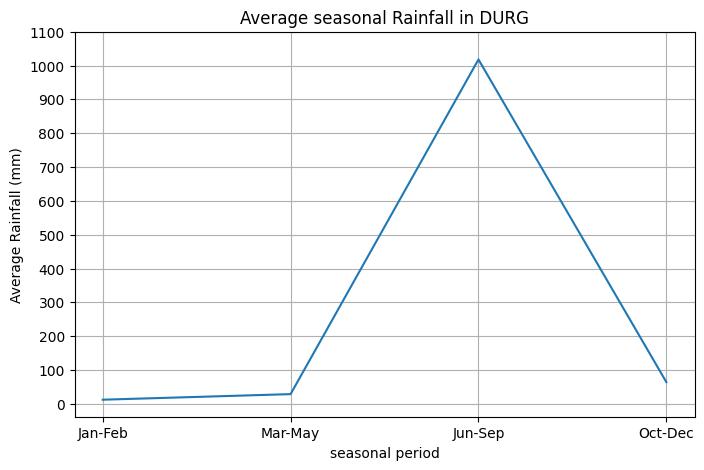

In [72]:
from pandas.core.arrays.period import period_array
plt.figure(figsize=(8,5))
sns.lineplot(x=cols_for_bar_periodwise,y=period_avg.values)
plt.yticks(np.arange(0,1200,100))
plt.grid(True)
plt.xlabel("seasonal period")
plt.ylabel("Average Rainfall (mm)")
plt.title("Average seasonal Rainfall in DURG")
plt.show()